In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Altcoin.altcoin.coinData import CoinData
%matplotlib inline

## FInd best values for sma & bma

use bma/sma = 2 to 3.5

In [2]:
btc = CoinData('btc')
eth = CoinData('eth')
xrp = CoinData('xrp')
bch = CoinData('bch')
eos = CoinData('eos')
ltc = CoinData('ltc')
iot = CoinData('iot')
xmr = CoinData('xmr')
trx = CoinData('trx')
etc = CoinData('etc')

In [3]:
CoinData.portfolio.price()

btc = $6424.3
eth = $220.5
xrp = $0.4604
bch = $452.21
eos = $5.3370000000000015
ltc = $56.317
iot = $0.53879
xmr = $112.15
trx = $0.020894
etc = $10.720999999999998


In [4]:
from Analize_coins.analize.analize_this import analize_this

In [5]:
# def analize_this(interval, commence):
#     results = []
#     numCoins = len(CoinData.portfolio)
#     for sma in range(6, 26):
#         start = 2 * sma
#         stop = round(3.5 * sma) + 1
#         step = (stop - start) // 8
#         for bma in range(start, stop, step):
#             lma = round(bma * 2.75)
#             profit = 0.0
#             CoinData.setParams(sma, bma, lma, interval)
#             for coin in CoinData.portfolio.values():
#                 trend, data = coin.trendFollower(start=commence)
#                 profit += trend['Profit'].iloc[-1]

#             results.append((sma, bma, lma, profit/numCoins))
#     return results

In [6]:
start = '2017-11-30'
results_3h = analize_this('3h', start)
results_6h = analize_this('6h', start)
results_12h = analize_this('12h', start)
results_1D = analize_this('1D', start)

In [7]:
df_3h = pd.DataFrame(results_3h, columns=('sma','bma', 'lma', 'profit'))
df_3h['ratio'] = df_3h['bma'] / df_3h['sma']

In [8]:
df_6h = pd.DataFrame(results_6h, columns=('sma','bma', 'lma', 'profit'))
df_6h['ratio'] = df_6h['bma'] / df_6h['sma']

In [9]:
df_12h = pd.DataFrame(results_12h, columns=('sma','bma', 'lma', 'profit'))
df_12h['ratio'] = df_12h['bma'] / df_12h['sma']

In [10]:
df_1D = pd.DataFrame(results_1D, columns=('sma','bma', 'lma', 'profit'))
df_1D['ratio'] = df_1D['bma'] / df_1D['sma']

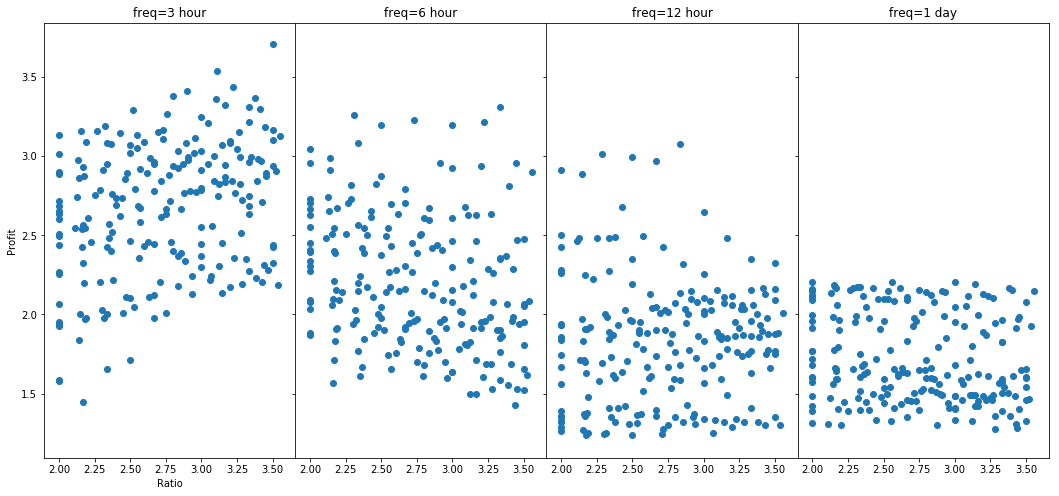

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,8), sharey=True, sharex=True)
ax1.scatter(df_3h.ratio, df_3h.profit)
ax2.scatter(df_6h.ratio, df_6h.profit)
ax3.scatter(df_12h.ratio, df_12h.profit)
ax4.scatter(df_1D.ratio, df_1D.profit)

ax1.set_title('freq=3 hour')
ax2.set_title('freq=6 hour')
ax3.set_title('freq=12 hour')
ax4.set_title('freq=1 day')
ax1.set_xlabel('Ratio')
ax1.set_ylabel('Profit')

fig.subplots_adjust(wspace=0)

What does this show us??

In [ ]:
df_6h['profit'].idxmax() 

In [ ]:
df_6h.iloc[46]

In [ ]:
df_1D['profit'].idxmax()


In [ ]:
d3h = df_3h[df_3h['profit'] > 3.8]
d3h

In [ ]:
d6h = df_6h[df_6h['profit'] > 3.8]
d6h

In [ ]:
d1D = df_1D[df_1D['profit'] > 3.2]
d1D

In [ ]:
d12h = df_12h[df_12h['profit'] > 3.2]
d12h

In [29]:
profit = 0.0
dataTuples = {}
CoinData.setParams(10, 27, 74, '6h')
for coin in CoinData.portfolio.values():
    trend, data = coin.trendFollower(start='2017-11-22')
    dataTuples[coin.name] = trend, data
    prof = trend['Profit'].iloc[-1]
    profit += prof
    print(coin.name, prof)
print('Total {}'.format(profit/len(CoinData.portfolio)))

btc 1.448737499707095
eth 1.8406469005661716
xrp 10.793777774747428
bch 2.0249789679963346
eos 2.743182454738276
ltc 2.3989050795910414
iot 2.1033639898438405
xmr 1.5348423084929015
trx 1.7530832054972199
etc 0.7643961156294905
Total 2.74059142968098


In [25]:
df_3h = pd.DataFrame(results_3h, columns=('sma bma lma portfolio_profit').split())
df_3h['portfolio_profit'].mean()

2.6687163330572234

In [26]:
df_6h = pd.DataFrame(results_6h, columns=('sma bma lma portfolio_profit').split())
df_6h['portfolio_profit'].mean()

2.2045959344257

In [27]:
df_12h = pd.DataFrame(results_12h, columns=('sma bma lma portfolio_profit').split())
df_12h['portfolio_profit'].mean()

1.8314976041565647

In [28]:
df_1D = pd.DataFrame(results_1D, columns=('sma bma lma portfolio_profit').split())
df_1D['portfolio_profit'].mean()

1.7223129973946398

The means of average profit over all the sma / bma values and ratios increase with sample frequency.
This ties in with crypto coins being very volatile. 
We need to be quick to catch the profits and aavoid the losses